In [1]:
from __future__ import print_function
import cv2 as cv
import argparse
import matplotlib.pyplot as plt
import numpy as np


In [2]:
max_value = 255
max_type = 4
max_binary_value = 255
trackbar_type = 'Type: \n 0: binary \n 1: bin invert \n 2: trunc \n 3: To Zero \n 4: To cero inverted'
trackbar_value = 'Value'
window_name = 'Threshold lab3,'
def Threshold_lab(val):
    threshold_type = cv.getTrackbarPos(trackbar_type, window_name)
    threshold_value = cv.getTrackbarPos(trackbar_value, window_name)
    _, dst = cv.threshold(src_gray, threshold_value, max_binary_value, threshold_type )
    cv.imshow(window_name, dst)
    


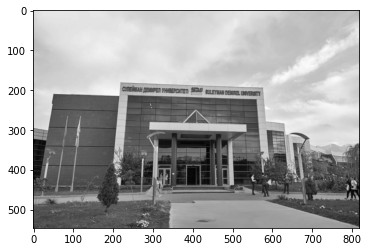

In [3]:
#resize picture
src = cv.imread("lab(thresh).jpg",cv.IMREAD_UNCHANGED)
scale_percent = 80 # percent of original size
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
src = cv.resize(src, dim, interpolation = cv.INTER_AREA)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(src_gray,cmap = plt.cm.gray)
plt.show()

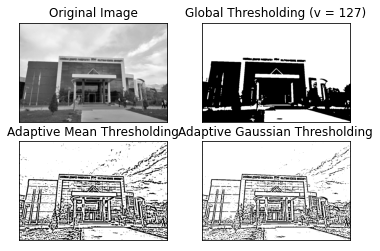

In [4]:
src_gray_bl = cv.medianBlur(src_gray,5)
ret,th1 = cv.threshold(src_gray_bl,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(src_gray_bl,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(src_gray_bl,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [src_gray_bl, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

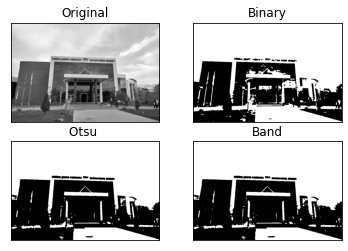

In [5]:
src_gray_bl = cv.medianBlur(src_gray,5)

ret,th1 = cv.threshold(src_gray_bl,100,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(src_gray_bl,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
band_th = cv.bitwise_and(th1,th2)

titles = ['Original', 'Binary',
            'Otsu ', 'Band']
images = [src_gray_bl, th1, th2,band_th]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
cv.namedWindow(window_name)
cv.createTrackbar(trackbar_type, window_name , 4, max_type, Threshold_lab)
# Create Trackbar to choose Threshold value
cv.createTrackbar(trackbar_value, window_name , 0, max_value, Threshold_lab)
# Call the function to initialize
Threshold_lab(0)
# Wait until user finishes program
cv.waitKey()